In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, log_loss


In [14]:
df = pd.read_csv('../Datasets/Sonar.csv')
X = df.drop('Class', axis=1)
label = LabelEncoder()
y = label.fit_transform(df['Class'])

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=25, stratify=y)

scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    y_pred = knn.predict_proba(xtest)
    scores.append([i, roc_auc_score(ytest, y_pred[:,1])])
    

df_scores = pd.DataFrame(scores, columns=['Neighbors', 'roc score'])
df_scores.sort_values(by='roc score', ascending=False)


,Neighbors,roc score
3,4,0.886410
2,3,0.879817
4,5,0.867647
1,2,0.867647
6,7,0.832150
5,6,0.824544
0,1,0.820487
7,8,0.802738
8,9,0.760142
9,10,0.746450


In [21]:
df = pd.read_csv('../Datasets/Sonar.csv')
X = df.drop('Class', axis=1)
label = LabelEncoder()
y = label.fit_transform(df['Class'])

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=25, stratify=y)

scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    y_pred = knn.predict_proba(xtest)
    scores.append([i, log_loss(ytest, y_pred[:,1])])
    

df_scores = pd.DataFrame(scores, columns=['Neighbors', 'log_loss'])
df_scores.sort_values(by='log_loss', ascending=True)


,Neighbors,log_loss
4,5,0.444209
6,7,0.489601
5,6,0.491665
7,8,0.509089
8,9,0.548890
9,10,0.559395
3,4,0.955119
2,3,2.537403
1,2,3.586762
0,1,6.293336


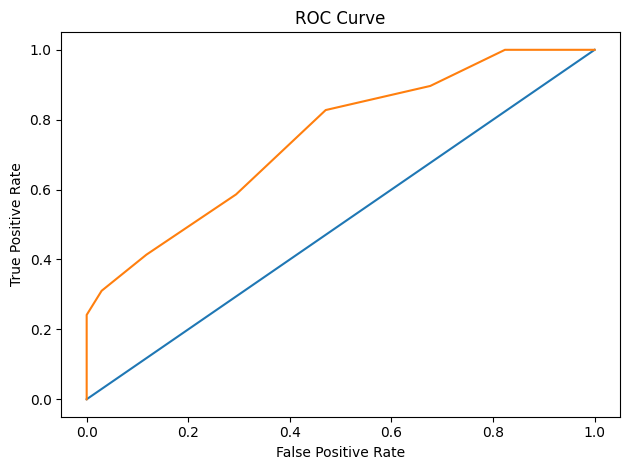

In [15]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred[:,1])
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.tight_layout()
plt.show()

In [17]:
solver = ['sag', 'newton-cg', 'newton-cholesky', 'lbfgs']
penalties = ['l2', None]
scores = []


for p in penalties:
    for s in solver:
        lr = LogisticRegression(solver=s, penalty=p, l1_ratio=0.5)
        lr.fit(xtrain, ytrain)
        y_pred = lr.predict_proba(xtest)
        scores.append([s, p, roc_auc_score(ytest, y_pred[:,1])])
    

df_scores = pd.DataFrame(scores, columns=['Solver', 'Penalty', 'roc score'])
df_scores.sort_values(by='roc score', ascending=False)

c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=N

,Solver,Penalty,roc score
0,sag,l2,0.805274
1,newton-cg,l2,0.805274
2,newton-cholesky,l2,0.805274
3,lbfgs,l2,0.805274
5,newton-cg,None,0.802231
4,sag,None,0.800203
6,newton-cholesky,None,0.772819
7,lbfgs,None,0.757099
